In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('grocery_dataset_eda.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df[(df['date'] >= '2005-01-01') & (df['date'] <= '2025-01-01')]
df = df.reset_index().set_index('date').drop(columns = 'index')
df

,US Grocery Sales,CPI (Food at Home),Real Disposable Income,Unemployment Rate,Initial Jobless Claims,Continued Jobless Claims,GDP,Personal Savings,Consumer Debt % DI,Credit Card Delinquency,...,Retail Wages_yoy_lag3,Retail Wages_yoy_lag4,Retail Wages_yoy_lag5,Retail Wages_yoy_lag6,Retail Wages_yoy_lag7,Retail Wages_yoy_lag8,Retail Wages_yoy_lag9,Retail Wages_yoy_lag10,Retail Wages_yoy_lag11,Retail Wages_yoy_lag12
date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,37628.0,188.100,11226.5,5.3,1717000.0,13619000.0,15844.727,247.1,7.303833,3.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01,37553.0,187.700,11229.0,5.4,1247000.0,10746000.0,15844.727,210.6,7.303833,3.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,37645.0,188.100,11268.8,5.2,1328000.0,10638000.0,15844.727,230.2,7.303833,3.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-01,38049.0,190.000,11304.2,5.2,1616000.0,13022000.0,15922.782,195.4,7.239296,3.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,37908.0,190.200,11352.7,5.1,1308000.0,10345000.0,15922.782,243.6,7.239296,3.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,75140.0,307.201,17519.6,4.1,897000.0,7325000.0,23400.294,830.7,5.478743,3.20,...,2.260360,2.732240,2.099076,2.743774,2.524190,2.931181,3.371746,2.425532,3.178694,4.197317
2024-10-01,75403.0,307.798,17584.7,4.1,948000.0,7494000.0,23536.293,881.0,5.512139,3.08,...,2.130326,2.260360,2.732240,2.099076,2.743774,2.524190,2.931181,3.371746,2.425532,3.178694
2024-11-01,75235.0,308.881,17618.8,4.2,1095000.0,9417000.0,NaN,838.1,NaN,NaN,...,2.292622,2.130326,2.260360,2.732240,2.099076,2.743774,2.524190,2.931181,3.371746,2.425532


In [3]:
vars = ['US Grocery Sales', 'US Grocery Sales_lag1', 'CPI (Food at Home)', 'Real Disposable Income adj', 'Avg Home Price', 'covid1', 'covid2']

# Count total missing values per column
missing_counts = df[vars].isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts

Avg Home Price    1
dtype: int64

In [4]:
df['Avg Home Price'] = df['Avg Home Price'].ffill()

In [5]:
# Define independent (X) and dependent (y) variables
X = df[['US Grocery Sales_lag1', 'CPI (Food at Home)', 'Real Disposable Income adj', 'Avg Home Price', 'covid1', 'covid2']]
y = df['US Grocery Sales']

# Add a constant for intercept
X = sm.add_constant(X)

# Fit OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

# Print detailed statistical summary
print(model.summary())

# merge fitted values onto dh.  We don't need to merge because the row indices are the same
df['US Grocery Sales_fcst'] = model.fittedvalues
df['US Grocery Sales_resid'] = model.resid

                            OLS Regression Results                            
Dep. Variable:       US Grocery Sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.820e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          2.83e-309
Time:                        18:02:05   Log-Likelihood:                -1849.5
No. Observations:                 241   AIC:                             3713.
Df Residuals:                     234   BIC:                             3737.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

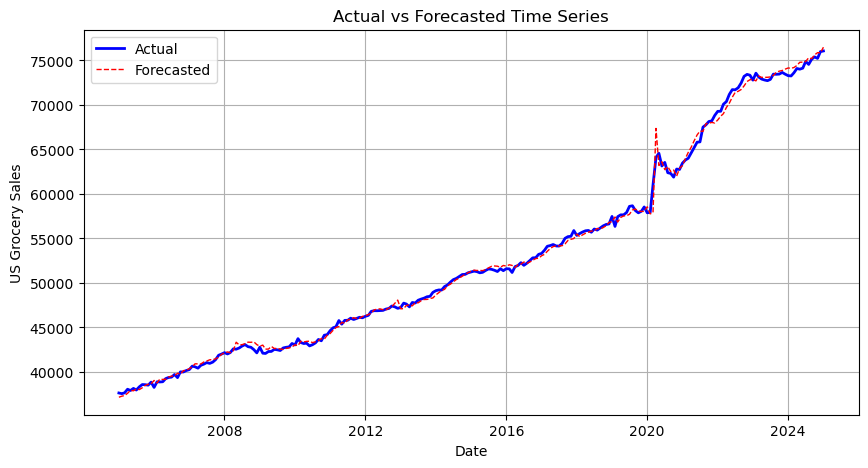

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y='US Grocery Sales', label='Actual', linewidth=2, color='blue')
sns.lineplot(data=df, x=df.index, y='US Grocery Sales_fcst', label='Forecasted', linewidth=1, color='red', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('US Grocery Sales')
plt.title('Actual vs Forecasted Time Series')
plt.legend()
plt.grid(True)

plt.show()

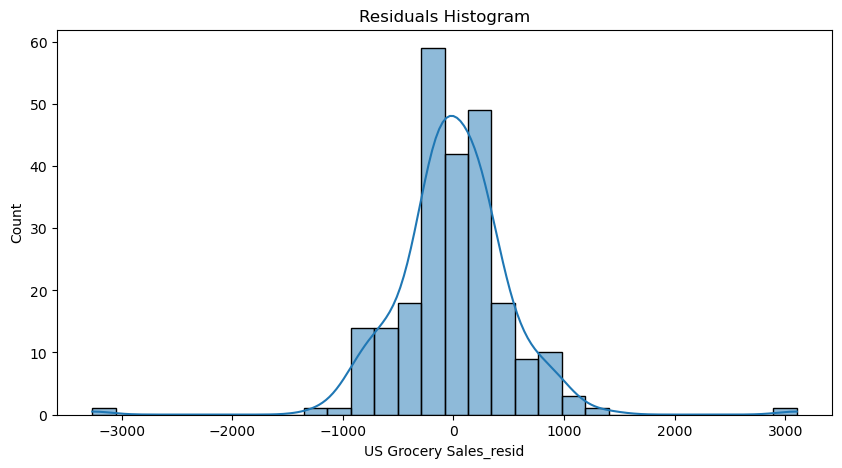

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df["US Grocery Sales_resid"], bins=30, kde=True)
plt.title('Residuals Histogram')
plt.show()

<Figure size 1000x500 with 0 Axes>

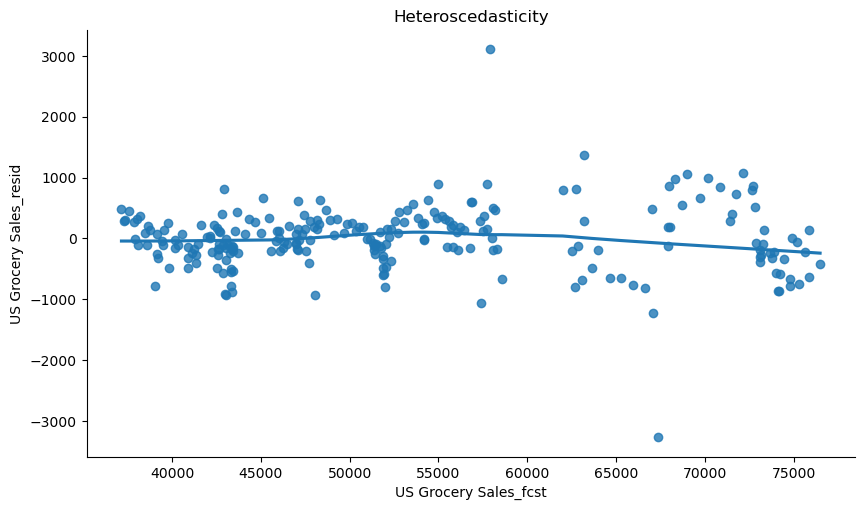

In [8]:
plt.figure(figsize=(10, 5))
sns.lmplot(x="US Grocery Sales_fcst", y="US Grocery Sales_resid", data=df, lowess=True, aspect=1.75, height=5)
plt.title('Heteroscedasticity')
plt.show()

In [9]:
# Step 1: Add a constant column (intercept)
X = sm.add_constant(X)

# Step 2: Initialize an empty list to store VIF values
vif_list = []

# Step 3: Loop through each feature and compute VIF
for i in range(X.shape[1]):  # Loop over each column index
    vif_value = variance_inflation_factor(X.values, i)  # Compute VIF for the column
    vif_list.append((X.columns[i], vif_value))  # Store (Feature Name, VIF Value)

# Step 4: Convert results into a DataFrame
vif_data = pd.DataFrame(vif_list, columns=["Feature", "VIF"])
vif_data

,Feature,VIF
0,const,626.349440
1,US Grocery Sales_lag1,108.987082
2,CPI (Food at Home),26.624504
3,Real Disposable Income adj,26.746330
4,Avg Home Price,7.429554
5,covid1,1.258981
6,covid2,1.247993


In [10]:
# Ensure X includes the same predictors used in training

# Get predictions and confidence intervals
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# Store forecasted values
df['US Grocery Sales_fcst'] = pred_summary['mean']
df['US Grocery Sales_se_mean'] = pred_summary['mean_se']  # SE of the mean
df['US Grocery Sales_se_lower'] = pred_summary['mean_ci_lower']  # SE of the mean
df['US Grocery Sales_se_upper'] = pred_summary['mean_ci_upper']  # SE of the mean
df['US Grocery Sales_obs_lower'] = pred_summary['obs_ci_lower']  # SE of the mean
df['US Grocery Sales_obs_upper'] = pred_summary['obs_ci_upper']  # SE of the mean

# ✅ Compute SE of the estimate (obs_se) using the correct columns
df['US Grocery Sales_se_obs'] = (df['US Grocery Sales_obs_upper'] - df['US Grocery Sales_obs_lower']) / (2 * 1.96)  # 95% CI

# # Show first few rows
df[['US Grocery Sales_fcst', 'US Grocery Sales_se_mean', 'US Grocery Sales_se_obs', 'US Grocery Sales_se_lower', 'US Grocery Sales_se_upper', 
    'US Grocery Sales_obs_lower', 'US Grocery Sales_obs_upper']].head()

,US Grocery Sales_fcst,US Grocery Sales_se_mean,US Grocery Sales_se_obs,US Grocery Sales_se_lower,US Grocery Sales_se_upper,US Grocery Sales_obs_lower,US Grocery Sales_obs_upper
date,,,,,,,
2005-01-01,37151.275744,85.056266,538.097824,36983.701831,37318.849657,36096.604010,38205.947478
2005-02-01,37270.084429,89.012169,538.743927,37094.716779,37445.452078,36214.146333,38326.022525
2005-03-01,37341.185875,86.740205,538.369360,37170.294344,37512.077405,36285.981930,38396.389820
2005-04-01,37592.877756,83.672972,537.878649,37428.029145,37757.726367,36538.635604,38647.119908
2005-05-01,37925.176952,85.842116,538.223897,37756.054795,38094.299110,36870.258114,38980.095790


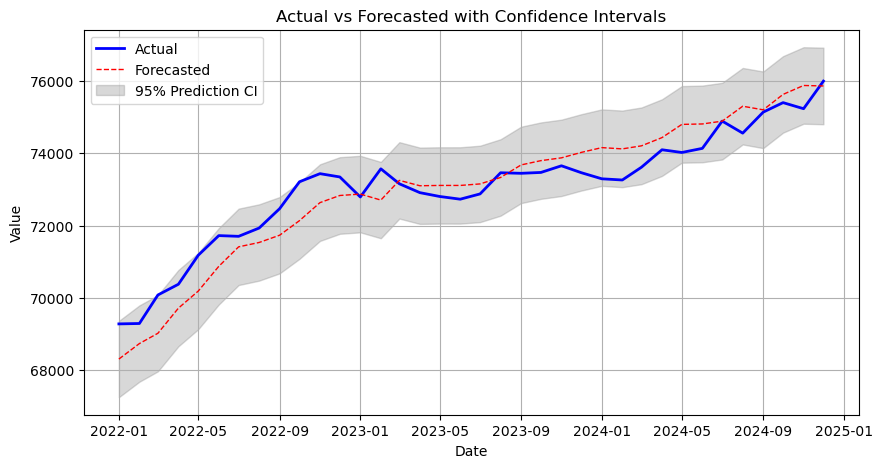

In [11]:
#Define the start and end date for filtering
start_date = '2022-01-01'
end_date = '2024-12-31'

#Filter the DataFrame to only include the desired months
df_subset = df.loc[start_date:end_date]
df_subset

#Plot the chart
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_subset, x=df_subset.index, y=df_subset['US Grocery Sales'], label='Actual', color='blue', linewidth=2.0)
sns.lineplot(data=df_subset, x=df_subset.index, y='US Grocery Sales_fcst', label='Forecasted', color='red', linewidth=1.0, linestyle='dashed')

plt.fill_between(df_subset.index, df_subset['US Grocery Sales_obs_lower'], df_subset['US Grocery Sales_obs_upper'], color='grey', alpha=0.3, label="95% Prediction CI")

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted with Confidence Intervals')
plt.legend()
plt.grid(True)

plt.show()


In [12]:
#Independent forward forecast estimates

cpi_fah_dic = {pd.Timestamp('2025-02-01'): 1.8, pd.Timestamp('2025-03-01'): 2.0, pd.Timestamp('2025-04-01'): 2.2, pd.Timestamp('2025-05-01'): 2.4,
                pd.Timestamp('2025-06-01'): 2.6, pd.Timestamp('2025-07-01'): 2.8, pd.Timestamp('2025-08-01'): 3.0, pd.Timestamp('2025-09-01'): 3.2, 
                pd.Timestamp('2025-10-01'): 3.4, pd.Timestamp('2025-11-01'): 3.6, pd.Timestamp('2025-12-01'): 3.8}

rdi_dic = {pd.Timestamp('2025-02-01'): 2, pd.Timestamp('2025-03-01'): 2, pd.Timestamp('2025-04-01'): 2, pd.Timestamp('2025-05-01'): 2,
                pd.Timestamp('2025-06-01'): 2, pd.Timestamp('2025-07-01'): 1.7, pd.Timestamp('2025-08-01'): 1.7, pd.Timestamp('2025-09-01'): 1.7, 
               pd.Timestamp('2025-10-01'): 1.7, pd.Timestamp('2025-11-01'): 1.7, pd.Timestamp('2025-12-01'): 1.7}

home_price_dic = {pd.Timestamp('2025-02-01'): 2, pd.Timestamp('2025-03-01'): 2, pd.Timestamp('2025-04-01'): 2, pd.Timestamp('2025-05-01'): 2,
                pd.Timestamp('2025-06-01'): 2, pd.Timestamp('2025-07-01'): 2, pd.Timestamp('2025-08-01'): 2, pd.Timestamp('2025-09-01'): 2, 
                  pd.Timestamp('2025-10-01'): 2, pd.Timestamp('2025-11-01'): 2, pd.Timestamp('2025-12-01'): 2}

In [13]:
forecast_months = pd.date_range("2025-02-01", "2025-12-01", freq="MS")
forward_df = pd.DataFrame(index=forecast_months)

# Fill in known inputs using your YOY % dictionaries
for date in forecast_months:
    prev_year = date - pd.DateOffset(years=1)
    
    forward_df.loc[date, "CPI (Food at Home)"] = df.loc[prev_year, "CPI (Food at Home)"] * (1 + cpi_fah_dic[date] / 100)
    forward_df.loc[date, "Real Disposable Income adj"] = df.loc[prev_year, "Real Disposable Income adj"] * (1 + rdi_dic[date] / 100)
    forward_df.loc[date, "Avg Home Price"] = df.loc[prev_year, "Avg Home Price"] * (1 + home_price_dic[date] / 100)

# Initialize lag variable
last_known_value = df.loc["2025-01-01", "US Grocery Sales"]
forward_df["US Grocery Sales_lag1"] = np.nan
forward_df.loc[forecast_months[0], "US Grocery Sales_lag1"] = last_known_value

# Add empty columns for forecast and intervals
forward_df["US Grocery Sales"] = np.nan
forward_df["US Grocery Sales_fcst"] = np.nan
forward_df["US Grocery Sales_obs_lower"] = np.nan
forward_df["US Grocery Sales_obs_upper"] = np.nan

# Pull the last 11 months of SE values (assumed to be Feb–Dec 2024)
se_obs_values = df['US Grocery Sales_se_obs'].iloc[-12:-1].copy()  # Or use .loc["2024-02-01":"2024-12-01"]

# Shift the index forward to 2025
se_obs_values.index = se_obs_values.index + pd.DateOffset(years=1)

# Assign these shifted SE values into forward_df
forward_df['US Grocery Sales_se_obs'] = se_obs_values


In [14]:
import numpy as np

# Extract model coefficients as a numpy array
beta = model.params.values

for i, month in enumerate(forward_df.index):
    row = forward_df.loc[month]

    x_row = np.array([
        1.0,
        row["US Grocery Sales_lag1"],
        row["CPI (Food at Home)"],
        row["Real Disposable Income adj"],
        row["Avg Home Price"],
        0,  # covid1
        0   # covid2
    ])
    
    y_pred = np.dot(x_row, beta)
    forward_df.at[month, "US Grocery Sales_fcst"] = y_pred

    # Apply 95% interval using preloaded SE
    se = row["US Grocery Sales_se_obs"]
    forward_df.at[month, "US Grocery Sales_obs_lower"] = y_pred - 1.96 * se
    forward_df.at[month, "US Grocery Sales_obs_upper"] = y_pred + 1.96 * se

    # Update lag for next iteration
    if i + 1 < len(forward_df):
        forward_df.iloc[i + 1, forward_df.columns.get_loc("US Grocery Sales_lag1")] = y_pred


In [15]:
df_subset = df[forward_df.columns]
df_subset = pd.concat([df_subset, forward_df], axis=0)
df_subset

,CPI (Food at Home),Real Disposable Income adj,Avg Home Price,US Grocery Sales_lag1,US Grocery Sales,US Grocery Sales_fcst,US Grocery Sales_obs_lower,US Grocery Sales_obs_upper,US Grocery Sales_se_obs
2005-01-01,188.100000,11226.5000,160.13100,37423.000000,37628.0,37151.275744,36096.604010,38205.947478,538.097824
2005-02-01,187.700000,11229.0000,161.92500,37628.000000,37553.0,37270.084429,36214.146333,38326.022525,538.743927
2005-03-01,188.100000,11268.8000,164.57700,37553.000000,37645.0,37341.185875,36285.981930,38396.389820,538.369360
2005-04-01,190.000000,11304.2000,167.00100,37645.000000,38049.0,37592.877756,36538.635604,38647.119908,537.878649
2005-05-01,190.200000,11352.7000,169.54600,38049.000000,37908.0,37925.176952,36870.258114,38980.095790,538.223897
...,...,...,...,...,...,...,...,...,...
2025-08-01,315.426170,17792.0082,331.64076,77889.583812,NaN,78000.487344,76942.470719,79058.503968,539.804400
2025-09-01,317.031432,17817.4332,331.27458,78000.487344,NaN,78188.790443,77129.205338,79248.375548,540.604646
2025-10-01,318.263132,17883.6399,330.69522,78188.790443,NaN,78439.456568,77381.259568,79497.653567,539.896428
2025-11-01,320.000716,17918.3196,330.16380,78439.456568,NaN,78721.860234,77663.657799,79780.062669,539.899202


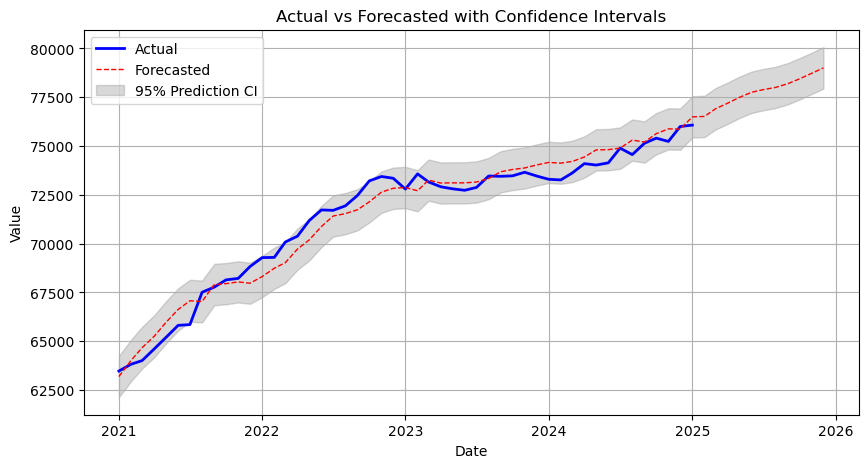

In [16]:
#Define the start and end date for filtering
start_date = '2021-01-01'
end_date = '2025-12-01'

#Filter the DataFrame to only include the desired months
df_chart = df_subset.loc[start_date:end_date]

#Plot the chart
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_chart, x=df_chart.index, y=df_chart['US Grocery Sales'], label='Actual', color='blue', linewidth=2.0)
sns.lineplot(data=df_chart, x=df_chart.index, y=df_chart['US Grocery Sales_fcst'], label='Forecasted', color='red', linewidth=1.0, linestyle='dashed')

plt.fill_between(df_chart.index, df_chart['US Grocery Sales_obs_lower'], df_chart['US Grocery Sales_obs_upper'], color='grey', alpha=0.3, label="95% Prediction CI")

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted with Confidence Intervals')
plt.legend()
plt.grid(True)

plt.show()

In [17]:
df_monthly = df_subset.sort_index()
df_monthly.index = pd.to_datetime(df_monthly.index)

df_monthly["US Grocery Sales"] = df_monthly["US Grocery Sales"].fillna(df_monthly["US Grocery Sales_fcst"])

df_monthly["Actual YOY %"] = df_monthly["US Grocery Sales"].pct_change(periods=12) * 100
df_monthly["Forecast YOY %"] = df_monthly["US Grocery Sales_fcst"].pct_change(periods=12) * 100

df_monthly["Actual YOY Change"] = df_monthly["US Grocery Sales"].diff(periods=12)
df_monthly["Forecast YOY Change"] = df_monthly["US Grocery Sales_fcst"].diff(periods=12)

df_monthly


,CPI (Food at Home),Real Disposable Income adj,Avg Home Price,US Grocery Sales_lag1,US Grocery Sales,US Grocery Sales_fcst,US Grocery Sales_obs_lower,US Grocery Sales_obs_upper,US Grocery Sales_se_obs,Actual YOY %,Forecast YOY %,Actual YOY Change,Forecast YOY Change
2005-01-01,188.100000,11226.5000,160.13100,37423.000000,37628.000000,37151.275744,36096.604010,38205.947478,538.097824,NaN,NaN,NaN,NaN
2005-02-01,187.700000,11229.0000,161.92500,37628.000000,37553.000000,37270.084429,36214.146333,38326.022525,538.743927,NaN,NaN,NaN,NaN
2005-03-01,188.100000,11268.8000,164.57700,37553.000000,37645.000000,37341.185875,36285.981930,38396.389820,538.369360,NaN,NaN,NaN,NaN
2005-04-01,190.000000,11304.2000,167.00100,37645.000000,38049.000000,37592.877756,36538.635604,38647.119908,537.878649,NaN,NaN,NaN,NaN
2005-05-01,190.200000,11352.7000,169.54600,38049.000000,37908.000000,37925.176952,36870.258114,38980.095790,538.223897,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,315.426170,17792.0082,331.64076,77889.583812,78000.487344,78000.487344,76942.470719,79058.503968,539.804400,4.615791,3.581280,3441.487344,2696.834768
2025-09-01,317.031432,17817.4332,331.27458,78000.487344,78188.790443,78188.790443,77129.205338,79248.375548,540.604646,4.057480,3.969067,3048.790443,2984.892773
2025-10-01,318.263132,17883.6399,330.69522,78188.790443,78439.456568,78439.456568,77381.259568,79497.653567,539.896428,4.026971,3.714056,3036.456568,2808.959258
2025-11-01,320.000716,17918.3196,330.16380,78439.456568,78721.860234,78721.860234,77663.657799,79780.062669,539.899202,4.634625,3.749149,3486.860234,2844.746137


In [18]:
df_annual = df_monthly.groupby(df_subset.index.year)[["US Grocery Sales", "US Grocery Sales_fcst"]].sum()

df_annual["Actual YOY %"] = df_annual["US Grocery Sales"].pct_change() * 100
df_annual["Forecast YOY %"] = df_annual["US Grocery Sales_fcst"].pct_change() * 100

df_annual["Actual YOY Change"] = df_annual["US Grocery Sales"].diff()
df_annual["Forecast YOY Change"] = df_annual["US Grocery Sales_fcst"].diff()

df_annual = df_annual.round(2)  # Optional: round for cleaner viewing

df_annual

,US Grocery Sales,US Grocery Sales_fcst,Actual YOY %,Forecast YOY %,Actual YOY Change,Forecast YOY Change
2005,457697.00,455190.66,NaN,NaN,NaN,NaN
2006,472130.00,473703.16,3.15,4.07,14433.00,18512.49
2007,491835.00,493772.30,4.17,4.24,19705.00,20069.15
2008,510355.00,514592.46,3.77,4.22,18520.00,20820.16
2009,510394.00,512366.03,0.01,-0.43,39.00,-2226.43
2010,521151.00,521381.26,2.11,1.76,10757.00,9015.23
2011,547528.00,546224.49,5.06,4.76,26377.00,24843.23
2012,562996.00,564699.96,2.83,3.38,15468.00,18475.47
2013,575841.00,572985.51,2.28,1.47,12845.00,8285.55
2014,601640.00,599438.84,4.48,4.62,25799.00,26453.33


In [19]:
df_monthly.to_csv('grocery_forecast_month.csv')
df_annual.to_csv('grocery_forecast_annual.csv')